In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Task A

In [2]:
#read in data
scores = pd.read_csv('assignment 3 sentiment scores.csv')
scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [3]:
#initialize function to calculate directional switching

def diff_func(a,b):
    filtered = scores[scores[a].notnull()]
    filtered = filtered[filtered[b].notnull()]
    diff = sum(filtered[a]-filtered[b])/len(filtered)
    if diff>0:
        return (a, b, diff)
    elif diff<0:
        return (b, a, -diff)
    else:
        return

In [4]:
#cartesian product for unique directional tuples

edge_set = set()
for i in range(len(scores.columns)):
    for j in range(i+1, len(scores.columns)):
        edge_set.add(diff_func(scores.columns[i], scores.columns[j]))
        
print edge_set

set([('LS', 'Sclass', 0.15333333333333332), ('LS', 'A6', 1.1666666666666667), ('3series', '7series', 0.1), ('RX', 'XJ', 2.0), ('RX', 'Sclass', 1.6666666666666667), ('A8', '3series', 1.1428571428571428), ('LS', 'ES', 0.3939393939393939), ('RX', '7series', 2.8), ('A8', '5series', 0.8333333333333334), ('A6', 'XJ', 1.0), ('LS', '3series', 0.75), ('LS', 'A8', 0.17045454545454544), ('ES', '7series', 0.36363636363636365), ('A6', '3series', 0.14285714285714285), ('5series', 'A6', 0.5), ('LS', 'RX', 0.375), ('A8', '7series', 0.075), ('ES', 'A6', 1.4), ('LS', '7series', 0.34545454545454546), ('Sclass', '7series', 0.2391304347826087), ('XJ', '7series', 0.5714285714285714), ('7series', 'A6', 1.6666666666666667), ('XJ', 'LS', 0.2), ('XJ', '3series', 3.0), ('RX', 'A6', 3.6666666666666665), ('ES', 'A8', 0.18181818181818182), ('RX', '5series', 3.6), ('ES', 'Sclass', 0.4444444444444444), ('Sclass', 'XJ', 0.375), ('RX', '3series', 2.6666666666666665), ('ES', '5series', 1.75), ('5series', 'LS', 0.1904761

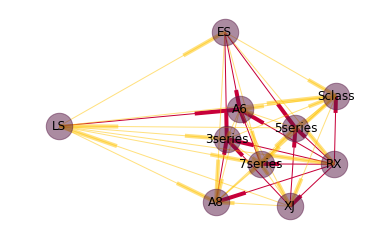

In [5]:
#make the ugly graph

G = nx.MultiDiGraph()

edge_set.discard(None)
for item in edge_set:
    G.add_edge(item[0], item[1], weight=item[2])

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1]

pos=nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='#581845', alpha=0.5)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1, edge_color='#C70039')
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='#FFC300')

# labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show() # display

## Task B

In [6]:
models = ['A6','A8','3-series','5-series','7-series','XJ','ES','LS','RX','S-class']
sales = [20000,12000,220000,60000,14000,6600,135000,30000,120000,25000]
data = pd.DataFrame({
    'Model':models,
    'Sales':sales
})
data

,Model,Sales
0,A6,20000
1,A8,12000
2,3-series,220000
3,5-series,60000
4,7-series,14000
5,XJ,6600
6,ES,135000
7,LS,30000
8,RX,120000
9,S-class,25000


#### Notes:
Convert the NetworkX multigraph to a regular graph to run page rank.  

Link: https://stackoverflow.com/questions/28560876/is-there-a-way-to-run-pagerank-algorithm-on-networkxs-multigraph

In [7]:
H = nx.Graph()
for u,v,d in G.edges(data=True):
    w = d['weight']
    if H.has_edge(u,v):
        H[u][v]['weight'] += w
    else:
        H.add_edge(u,v,weight=w)

### Weighted Network Graph

In [8]:
un_ng = nx.pagerank(H)
un_ng

{'3series': 0.11785451842024434,
 '5series': 0.11187137090813651,
 '7series': 0.07840800416635953,
 'A6': 0.12127193989117901,
 'A8': 0.06399085895628849,
 'ES': 0.08401729264678429,
 'LS': 0.05154612833579224,
 'RX': 0.20042572013899274,
 'Sclass': 0.0623210452731237,
 'XJ': 0.10829312126309945}

##### Correlation Coefficient 

In [9]:
import numpy as np
## Extract values from the pandas dataframe and the dictionary. 
np.corrcoef(un_ng.values(),data['Sales'])[0,1]

-0.22208946764316029

### Unweighted Network Graph

In [10]:
w_ng = nx.pagerank(H,weight='None')
w_ng

{'3series': 0.09392145882928801,
 '5series': 0.09392145882928801,
 '7series': 0.10405236078047467,
 'A6': 0.10405236078047467,
 'A8': 0.1040523607804747,
 'ES': 0.09392145882928801,
 'LS': 0.10405236078047468,
 'RX': 0.10405236078047467,
 'Sclass': 0.10405236078047467,
 'XJ': 0.09392145882928798}

##### Correlation Coefficient 

In [11]:
np.corrcoef(w_ng.values(),data['Sales'])[0,1]

0.22068962979267567